# Assignment 4

## Instructions
This is an individual assignment. You are not allowed to discuss the problems with other students.

- Part of this assignment will be autograded by Gradescope. You can use it as immediate feedback to improve your answers. You can resubmit as many times as you want. We provide some tests which you can use to check that your code will execute properly on Gradescope. These are **not** meant to check the correctness of your answers. We encourage you to write your own tests for this.
- All your code, analysis, graphs, explanations, etc. should be done in this same notebook.
- Please make sure to execute all the cells before you export the notebook to a PDF and submit it to Gradescope. You will not get points for the plots if they are not generated already.
- If you have questions regarding the assignment, you can ask for clarifications in Piazza. You should use the corresponding tag for this assignment.

Before starting the assignment, make sure that you have downloaded all the data and tests related for the assignment and put them in the appropriate locations. If you run the next cell, we will set this all up automatically for you in a dataset called public, which will contain both the data and tests you use.

**Warning**: Throughout the assignment, you will be asked to implement certain algorithms and find optimal values. In the solution you submit, do not simply call a library function which performs the entire algorithm for you, this is forbidden, as it would obviously defeat the purpose. For example, if you were asked to implement the linear regression, do not simply call an outside package for help.

**When Submitting to GradeScope**: Be sure to
1) Submit a `.ipynb` notebook to the `Assignment 4 - Practical` section on Gradescope.
2) Submit a `pdf` version of the notebook to the `Assignment 4 - Analysis` entry.

**Note**: You can choose to submit responses in either English or French.

In [37]:
!pip install -q otter-grader
!git clone https://github.com/chandar-lab/INF8245e-assignments-2023.git public


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
fatal: destination path 'public' already exists and is not an empty directory.


In this assignment, we will walk you through the steps of implement a simple neural network with all necessary components. You will attempt to replicate your own version of _PyTorch_ by defining minimalistic clases which ressemble the famous deep learning library.

![](https://drive.google.com/uc?export=view&id=1RRxUje8FRJFDcAfIxyA9WBrphgq96Q-X)

You will implement commonly used activation functions such as `softmax`, `tanh`, and `relu`, and loss fuction such as `cross entropy`. For each activation layer, you will implement the forward and backward pass by computing the gradient. Finally, you will put everything together in a training loop and train it on the MNIST dataset of hand-written digits.



In [38]:
# DO NOT RE-SEED ANYWHERE OTHERWISE YOUR IMPLEMENTATION MAY FAIL SOME UNIT TESTS
import os
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Union, Dict, Callable

np.random.seed(8245)

%matplotlib inline

working_dir = './A4' #  TO THECHANGE THIS MAIN ASSIGNMENT DIRECTORY

In [39]:
%cd public/a4

c:\Users\lomin\Desktop\ML_assignments\A4\public\a4\public\a4\public\a4


In [40]:
# Initialize Otter
import otter

os.makedirs("tests", exist_ok=True)

grader = otter.Notebook(colab=True, tests_dir='./tests')

## **Question 1: Layer Classes (12 points)**


The following class `Layer` is a super-class from which subsequent layer, activation, and loss classes will be inherited. Nothing needs to be changed here, but it's good to get familiar with the stucture and the instuctions.

In [41]:
class Layer:
    """
    Base class for all layers.
    """
    def __init__(self):
        """
        Initialize layer parameters (if any) and auxiliary data that is needed for,
        usually, variables like input_size, output_size, are initialized here.
        """

    def init_weights(self):
        """
        Initialize the weights of the layer, if applicable.
        """
        pass

    def forward(self, input):
        """
        Forward pass of the layer.
        Parameter:
            input: input data
        Returns:
            output: output of the layer
        """
        pass

    def backward(self, output_grad):
        """
        Backward pass of the layer.
        Parameter:
            output_grad: gradient of the output of the layer (dy)
        Returns:
            input_grad: gradient of the input of the layer (dx)
        """
        pass

    def update(self, learning_rate):
        """
        Update the layer parameters, if applicable.
        Parameter:
            learning_rate: learning rate used for updating
        """
        pass

### Q1 a) **(10 points)**


Follow the instuctions in the comments, implement a fully-connected layer (`Dense`) capable of working with any generic input and output sizes. It should define its weight and bias matrices inside.



In [42]:
class Dense(Layer):
    """
    Fully connected layer.
    """
    def __init__(
        self,
        input_size,
        output_size,
        weights=None,
        bias=None
    ):
        """
        Initialize the layer.
        Parameters:
            input_size (int): input size of the layer
            output_size (int): output size of the layer
            weights (np.ndarray): weights of the layer
            bias (np.ndarray): bias of the layer
        """
        super().__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.init_weights(weights=weights, bias=bias)

    def init_weights(self, weights=None, bias=None):
        """
        Initializes the weights of the layer.
        If weights and bias are not provided, they are initialized
        with a Gaussian N(0, 1) random values and zeros, respectively.
        Parameters:
            weights (np.ndarray): weights of the layer, shape: (self.input_size, self.output_size)
            bias (np.ndarray): bias of the layer, shape: (1, self.output_size)
        """
        if weights is None:
            self.weights = np.random.normal(0, 1, (self.input_size, self.output_size))
        else:
            self.weights = weights

        if bias is None:
            self.bias = np.zeros((1, self.output_size))
        else:
            self.bias = bias

    def forward(self, x):
        """
        Forward pass of the layer.
        Parameters:
            x (np.ndarray): input of the layer, shape: (batch_size, self.input_size)
        Returns:
            output (np.ndarray): output of the layer, shape: (batch_size, self.output_size)
        """
        self.input = x
        self.output = np.dot(x, self.weights) + self.bias
        return self.output

    def backward(self, output_grad):
        """
        Backward pass of the layer.
        Parameters:
            output_grad (np.ndarray): gradient of the output of the layer (dy), shape: (batch_size, self.output_size)
        Returns:
            input_grad (np.ndarray): gradient of the input of the layer (dx), shape: (batch_size, self.input_size)
        """
        self.weights_grad = np.dot(self.input.T, output_grad)
        self.bias_grad = np.sum(output_grad, axis=0, keepdims=True)
        self.input_grad = np.dot(output_grad, self.weights.T)
        return self.input_grad
    
    def update(self, learning_rate):
        """
        Update the layer parameters. Normally, this is done by using the
        gradients computed in the backward pass; therefore, backward() must
        be called before update().
        This function implements SGD (stochastic gradient descent)
        Parameter:
            learning_rate (float): learning rate used for updating
        """
        # assumes self.backward() function has been called before
        assert hasattr(self, 'weights_grad'), \
            'must compute gradient of weights before'
        assert hasattr(self, 'bias_grad'), \
            'must compute gradient of bias before'
        self.weights -= learning_rate * self.weights_grad
        self.bias -= learning_rate * self.bias_grad


In [43]:
grader.check("q1.1")

q1.1 results: All test cases passed!

### Q1 b) **(2 points)**

- In one or two sentences, what is the purpose of bias variables?
- In one or two sentences, what is the purpose of activation functions in neural networks, and why are they important?

- The bias is used to adjust the output of a layer. It helps the model be more flexible because it will be able to consider solution that do not pass through the origin.
- Activation function are used to introduce non-linearity to the output of a neuron. They are important because the function composition of 2 linear function is still a linear function (ex: g (f (x))), if we did not use activation function to introduce non linearity, the neural network would be like a linear regression model.

<!-- END QUESTION -->

## **Question 2: Activation and Loss Layers (20 points)**



### Q2 a) **(15 points)**

Implement the forward pass for `softmax`, `tanh`, and `relu` layers. The forward pass fuction receives the input data (usually a vector or a tensor) from the previous layer, and applies the activation function element-wise to the input data to compute the output of the activation layer.  

(We will come back to implementing the backward pass later as well.)


In [44]:
class SoftmaxLayer(Layer):
    """
    Softmax layer.
    """
    def forward(self, x):
        """
        Forward pass of the layer.
        The output's sum along the second axis should be 1.
        Parameter:
            x (np.ndarray): input of the layer, shape: (batch_size, input_size)
        Returns:
            output (np.ndarray): output of the layer, shape: (batch_size, input_size)
        """
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        self.output = exp_x / np.sum(exp_x, axis=1, keepdims=True)
        return self.output


    def backward(self, output_grad):
        """
        Backward pass of the layer.
        Parameter:
            output_grad (np.ndarray): gradient of the output of the layer (dy), shape: (batch_size, input_size)
        Returns:
            input_grad (np.ndarray): gradient of the input of the layer (dx), shape: (batch_size, input_size)
        """
        self.input_grad = self.output * (output_grad - np.sum(self.output * output_grad, axis=1, keepdims=True))
        return self.input_grad


class TanhLayer(Layer):
    """
    Tanh layer.
    """
    def forward(self, x):
        """
        Forward pass of the layer.
        Parameter:
            x (np.ndarray): input of the layer, shape: (batch_size, input_size)
        Returns:
            output (np.ndarray): output of the layer, shape: (batch_size, input_size)
        """
        self.output = np.tanh(x)
        return self.output

    def backward(self, output_grad):
        """
        Backward pass of the layer.
        Parameter:
            output_grad (np.ndarray): gradient of the output of the layer (dy), shape: (batch_size, input_size)
        Returns:
            input_grad (np.ndarray): gradient of the input of the layer (dx), shape: (batch_size, input_size)
        """
        self.input_grad = output_grad * (1 - self.output**2)
        return self.input_grad


class ReLULayer(Layer):
    """
    ReLU layer.
    """
    def forward(self, x):
        """
        Forward pass of the layer.
        Parameter:
            x (np.ndarray): input of the layer, shape: (batch_size, input_size)
        Returns:
            output (np.ndarray): output of the layer, shape: (batch_size, input_size)
        """
        self.output = np.maximum(0, x)
        return self.output

    def backward(self, output_grad):
        """
        Backward pass of the layer.
        Parameter:
            output_grad (np.ndarray): gradient of the output of the layer (dy), shape: (batch_size, input_size)
        Returns:
            input_grad (np.ndarray): gradient of the input of the layer (dx), shape: (batch_size, input_size)
        """
        self.input_grad = output_grad * (self.output > 0)
        return self.input_grad


In [45]:
grader.check("q2.1")

q2.1 results: All test cases passed!

### Q2 b) **(5 points)**
Now, implement a cross-entropy loss layer.

The forward pass again receives the predicted class probabilities (output from a previous activation layer) and the ground truth labels (target). It computes the cross-entropy loss using the predicted probabilities and the ground truth labels. The loss function measures the dissimilarity between the predicted probabilities and the actual labels.

In the backward pass, you need to compute the gradient of the loss with respect to the predicted probabilities. This gradient will be used to update the weights and biases of the preceding layers during backpropagation.

The equation for the cross-entropy loss is given by:
$$
\mathcal{L} = -\sum_{i=1}^{N} y_i \log(p_i)
$$
where $y_i$ is the ground truth label, $p_i$ is the predicted probability for class $i$, and $N$ is the number of classes.

Note that here we are NOT averaging the loss over the batch, so the loss is simply the sum of the losses for each sample in the batch; therefore, for the purposes of this assignment, dividing by the batch size might cause failures while testing your code. In deep learning libraries, such as PyTorch, choosing whether to average the loss over the batch or not is a parameter that can be set by the user; yet this assignment does not require you to implement this functionality.

The `.forward()` function receives two parameters:
- `prediction`: the predicted class **probabilities** (output from a previous activation layer), of shape `(batch_size, num_classes)`. Therefore, each row should sum to 1.
- `target`: the ground truth labels, of shape `(batch_size, )`. Each element is an integer between 0 and `num_classes - 1`.

Finally, to handle numerical stability, it is a good practice to add a small value (e.g. $10^{-10}$) to the predicted probabilities before taking the logarithm.


In [46]:
class CrossEntropyLossLayer(Layer):
    """
    Cross entropy loss layer.
    """

    def forward(self, prediction, target):
        """
        Forward pass of the layer.
        Note that prediction input is assumed to be a probability distribution (e.g., softmax output).
        Parameters:
            prediction (np.ndarray): prediction of the model, shape: (batch_size, num_classes)
            target (np.ndarray): target, shape: (batch_size,)
        Returns:
            output (float): cross entropy loss, averaged over the batch
        """
        self.batch_size = prediction.shape[0]
        self.prediction = prediction
        self.target = target

        epsilon = 1e-10
        predicted_probs = prediction[np.arange(len(prediction)), target]
        predicted_probs = np.maximum(predicted_probs, epsilon)

        cross_entropy_loss = -np.sum(np.log(predicted_probs))/self.batch_size
        return cross_entropy_loss

    def backward(self, output_grad):
        """
        Backward pass of the layer.
        Parameter:
            output_grad (float): gradient of the output of the layer (dy)
        Returns:
            input_grad (np.ndarray): gradient of the input of the layer (dx), shape: (batch_size, num_classes)
        """
        input_grad = np.zeros_like(self.prediction)
        input_grad[np.arange(self.batch_size), self.target] = -1 / (self.prediction[np.arange(self.batch_size), self.target])
        input_grad *= output_grad
        input_grad /= self.batch_size
        return input_grad


In [47]:
grader.check("q2.2")

q2.2 results: All test cases passed!

## **Question 3: Putting it all together: MLP (5 points)**

Now, we will put everything together and implement an MLP (multi-layer perceptron) class which is capable enough of stacking multiple layers.

### Q3 a) **(5 points)**

Implement a multi-layer perceptron class (`MLP`) capable of stacking multiple layers.

In [48]:
class MLP(Layer):
    """
    Multi-layer perceptron.
    """
    def __init__(self, layers):
        """
        Initialize the MLP. The passed list of layers usually
        follows the order: [Dense, Activation, Dense, Activation, ...]
        Parameters:
            layers (list): list of layers of the MLP
        """
        super().__init__()
        self.layers = layers

    def forward(self, input):
        """
        Forward pass of the MLP.
        Go over each layers sequentially and call their .forward() function.
        Don't forget to store every intermediate results in order to use them
        in the backward pass.
        Parameter:
            input (np.ndarray): input of the MLP, shape: (batch_size, input_size)
                                (NOTE: input_size is the size of the input of the first layer)
        Returns:
            output (np.ndarray): output of the MLP, shape: (batch_size, output_size)
                                 (NOTE: output_size is the size of the output of the last layer)
        """
        self.layer_inputs = [input]
        for layer in self.layers:
            input = layer.forward(input)
            self.layer_inputs.append(input)
        return input

    def backward(self, output_grad):
        """
        Backward pass of the MLP.
        Go over each layers in reverse order and call their .backward() function.
        Make sure to pass the correct gradient to each layer.
        Parameter:
            output_grad (np.ndarray): gradient of the output of the MLP (dy)
        Returns:
            input_grad (np.ndarray): gradient of the input of the MLP (dx)
        """
        self.layer_grads = [output_grad]
        for i in range(len(self.layers) - 1, -1, -1):
            output_grad = self.layers[i].backward(output_grad)
            self.layer_grads.insert(0, output_grad)
        return output_grad

    def update(self, learning_rate):
        """
        Update the MLP parameters. Normally, this is done by using the
        gradients computed in the backward pass; therefore, .backward() must
        be called before update().
        Parameter:
            learning_rate (float): learning rate used for updating
        """
        # assumes self.backward() function has been called before
        assert hasattr(self, 'layer_grads'), \
            'must compute gradient of weights beforehand'
        for i in range(len(self.layers)):
            self.layers[i].update(learning_rate)


In [49]:
grader.check("q3.1")

q3.1 results: All test cases passed!

## **Question 4: Training loop (10 points)**

Ta-ta! We have now build a neural network from scratch, and it is ready to be trained. We will train the neural network on the MNIST dataset consists of hand-written digits. You don't have to change the implementation for this part.

### Q4 a) **(10 points)**

We now provide a training loop for you to observe your implementation in action. You should see this part deliver the expected behavior if you have implemented everything correctly. The provided code behaves as follows:

1. Loads the MNIST dataset.
2. Visualizes some samples from the dataset.
3. $\to$ Initializes the neural network.
4. $\to$ Trains the neural network for 20 epochs.
5. $\to$ Evaluates the neural network on the test set.
6. $\to$ Plots the training loss and accuracy.

Your implementation impacts the previous points preceded by a $\to$. At the end, you should see a plot of the training loss and accuracy. The loss should decrease and the accuracy should increase as the training progresses.

**Please DO NOT modify the following training scripts.**

Even though the curious programmer would want to play with the hyperparameters, we ask you to keep them as they are for the sake of the grading process.

<!-- BEGIN QUESTION -->



In [50]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm

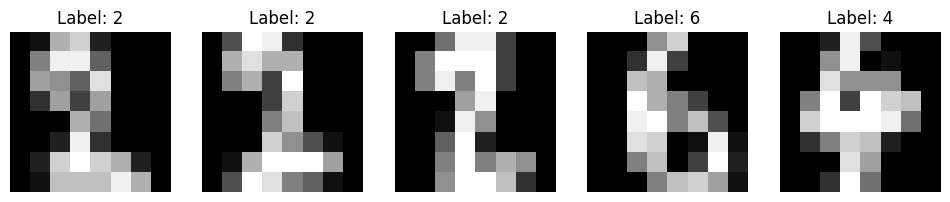

In [51]:
# set experiment's random seed
generator = np.random.default_rng(8249)

# Load the minimalistic MNIST dataset using scikit-learn
mnist = load_digits()
data, labels = mnist.data, mnist.target

# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    data,
    labels,
    test_size=0.2,
    random_state=8249
)

# We visualize some digits
num_digits_to_visualize = 5

# Create subplots to display the digits
fig, axes = plt.subplots(1, num_digits_to_visualize, figsize=(12, 3))

for i, img_idx in enumerate(generator.integers(
    low=0,
    high=train_images.shape[0],
    size=num_digits_to_visualize
)):
    # Reshape the flattened image data back to 28x28
    digit_image = train_images[img_idx].reshape(8, 8)

    # Display the digit image
    axes[i].imshow(digit_image, cmap='gray')
    axes[i].set_title(f"Label: {train_labels[img_idx]}")
    axes[i].axis('off')

plt.show()

In [52]:
# Define a simple MLP model
input_size = 64
hidden_size = 128
output_size = 10

# initialize weights using Xavier initialization
W_1 = generator.normal(0, 1, (input_size, hidden_size)) * np.sqrt(1 / input_size)
b_1 = np.zeros((1, hidden_size))
W_2 = generator.normal(0, 1, (hidden_size, output_size)) * np.sqrt(1 / hidden_size)
b_2 = np.zeros((1, output_size))

mlp = MLP([
    Dense(input_size, hidden_size, weights=W_1, bias=b_1),
    TanhLayer(),
    Dense(hidden_size, output_size, weights=W_2, bias=b_2),
    SoftmaxLayer()
])

# Define a cross-entropy loss layer
cross_entropy_layer = CrossEntropyLossLayer()

In [53]:
# Training parameters
learning_rate = 0.1
epochs = 20
batch_size = 128

# Training loop
epoch_bar = tqdm(range(epochs), desc='Epoch')
train_accuracies = []
train_losses = []
for epoch in epoch_bar:
    step_accuracies = []
    step_losses = []
    for step, i in enumerate(range(0, len(train_images), batch_size)):
        # Prepare the batch
        batch_images = train_images[i:i + batch_size]
        batch_labels = train_labels[i:i + batch_size]

        # Forward pass
        output = mlp.forward(batch_images)
        loss = cross_entropy_layer.forward(output, batch_labels)

        # Backward pass
        loss_grad = cross_entropy_layer.backward(loss)
        mlp.backward(loss_grad)
        mlp.update(learning_rate)

        # train accuracy
        total = len(batch_images)
        predictions = np.argmax(output, axis=1)
        correct = np.sum(predictions == batch_labels)
        accuracy = correct / total
        step_accuracies.append(accuracy)
        step_losses.append(loss)

    train_accuracies.append(np.mean(step_accuracies))
    train_losses.append(np.mean(step_losses))
    epoch_bar.set_postfix({
        'train loss': train_losses[-1],
        'train accuracy': train_accuracies[-1]
    })

print("Training complete.")

# Evaluate the model at the end of training
correct = 0
total = len(test_images)
for i in range(0, total, batch_size):
    batch_images = test_images[i:i + batch_size]
    batch_labels = test_labels[i:i + batch_size].astype(int)

    output = mlp.forward(batch_images)
    predictions = np.argmax(output, axis=1)
    correct += np.sum(predictions == batch_labels)

test_accuracy = correct / total
print(f"Test accuracy: {test_accuracy:.2%}")

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Training complete.
Test accuracy: 95.00%


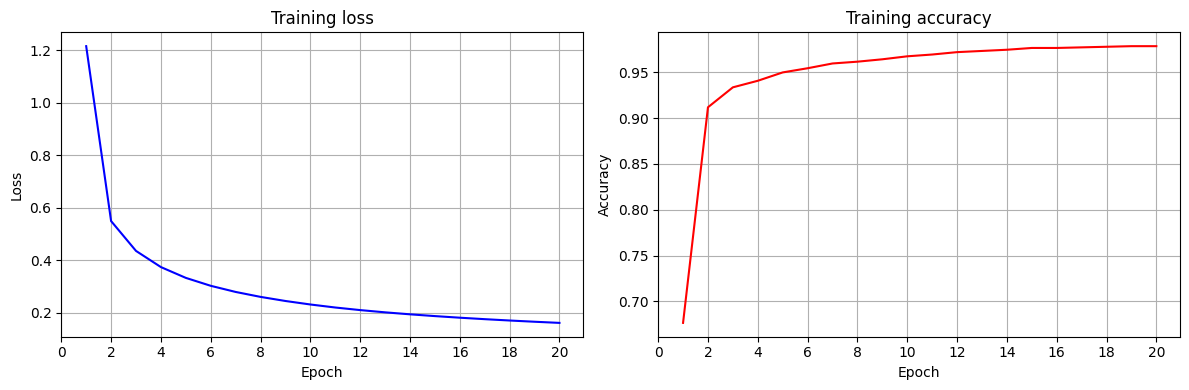

In [54]:
# plot training curves
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(
    np.arange(1, epochs+1),
    train_losses,
    color='blue'
)
axes[0].set_title('Training loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].grid()

axes[1].plot(
    np.arange(1, epochs+1),
    train_accuracies,
    color='red'
)
axes[1].set_title('Training accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].grid()

axes[0].set_xticks(range(0, epochs+1, 2))
axes[1].set_xticks(range(0, epochs+1, 2))
fig.tight_layout()

plt.show()

<!-- END QUESTION -->

